<a href="https://colab.research.google.com/github/alisterpage/CHEM3580-Jupyter-Notebooks/blob/main/H2_phasespace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipympl -q 2>&1 >/dev/null

interactive(children=(FloatSlider(value=0.751, description='r', max=1.251, min=0.251, step=0.01), Output()), _…

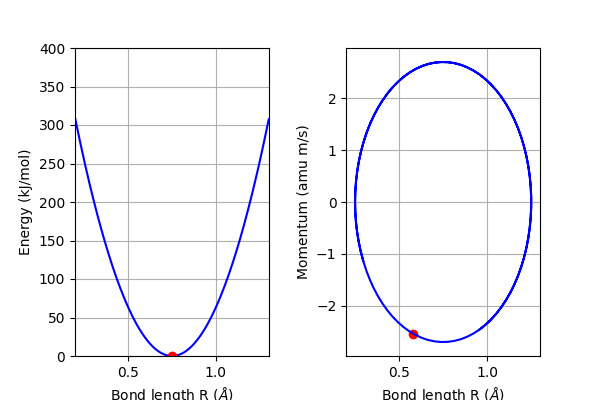

In [26]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from google.colab import output
output.enable_custom_widget_manager()

# set up plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
ax[0].set_ylim([0, 400])
ax[0].set_xlim([0.2,1.3])
ax[0].set_ylabel("Energy (kJ/mol)")
ax[0].set_xlabel("Bond length R ($\AA$)")
ax[0].grid(True)
ax[1].set_xlabel("Bond length R ($\AA$)")
ax[1].set_ylabel("Momentum (amu m/s)")
#ax[1].set_xlim([0.251,1.251])
#ax[1].set_ylim([-20.0,+20.0])
ax[1].grid(True)
 
#declare globals
xarray = np.linspace(0.2, 1.3, 150)
xmin=0.751
k = 1020.0
A = 0.5
w = 10.0
m = 1.08*1.08/(1.08+1.08)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(A,w,r):
    return A*np.cos(w*r)

def harmonic_momentum(A,w,r,m):
    return -m*A*w*np.sin(w*r)

@widgets.interact(r=(0.251, 1.251, 0.01),continuous_update=False)
def update(r = 0.751):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax[0].lines]
    fig_size = fig.get_size_inches()*fig.dpi   
    ax[0].plot(xarray, harmonic_curve(k,xarray,xmin),color='blue')
    ax[0].plot(r,harmonic_energy(k,r,xmin),marker="o",color='red')
    ax[1].plot(xmin-harmonic_position(A,w,r),harmonic_momentum(A,w,r,m),marker="o",color='red')
    ax[1].plot(xmin-harmonic_position(A,w,xarray),harmonic_momentum(A,w,xarray,m),color='blue')
   


